https://www.youtube.com/watch?v=il8dMDlXrIE

In [1]:
import numpy as np
import pandas as pd
import cv2
import os
from pycaret.classification import *
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

In [32]:
input_dir = 'num_data'
categories = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

data = []
labels = []

for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir, category, file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (28, 28))
        img = img.flatten()
        data.append(img)
        labels.append(category_idx)

data = np.asarray(data)
labels = np.asarray(labels)

In [31]:
df = pd.DataFrame(data)
df['labels'] = labels
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,labels
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0


In [43]:
df.shape

(350, 785)

In [61]:
df['labels'].value_counts()

0    35
1    35
2    35
3    35
4    35
5    35
6    35
7    35
8    35
9    35
Name: labels, dtype: int64

In [33]:
s = setup(df, target = 'labels', session_id = 123, train_size = 0.8)

In [34]:
compare_models()

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [52]:
pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6214,0.9052,0.6214,0.6636,0.6064,0.5793,0.5873,0.541
lr,Logistic Regression,0.5929,0.8978,0.5929,0.6383,0.5783,0.5477,0.5558,1.263
rf,Random Forest Classifier,0.5750,0.8939,0.5750,0.6428,0.5640,0.5277,0.5371,0.443
svm,SVM - Linear Kernel,0.5393,0.0000,0.5393,0.5684,0.5107,0.4897,0.5094,0.199
lightgbm,Light Gradient Boosting Machine,0.5321,0.8771,0.5321,0.5754,0.5251,0.4797,0.4871,0.970
ridge,Ridge Classifier,0.4500,0.0000,0.4500,0.4702,0.4284,0.3893,0.3973,0.154
nb,Naive Bayes,0.4071,0.6824,0.4071,0.4285,0.3818,0.3417,0.3526,0.168
gbc,Gradient Boosting Classifier,0.4036,0.8048,0.4036,0.4303,0.3898,0.3371,0.3432,6.775
lda,Linear Discriminant Analysis,0.3714,0.7507,0.3714,0.3910,0.3511,0.3010,0.3079,0.277
knn,K Neighbors Classifier,0.3571,0.7513,0.3571,0.3982,0.3383,0.2854,0.2952,0.230


In [66]:
model = create_model('et')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:16:04
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5714,0.8685,0.5714,0.5938,0.5382,0.5234,0.5389
1,0.7500,0.9201,0.7500,0.8113,0.7293,0.7224,0.7307
2,0.6429,0.9308,0.6429,0.7357,0.6331,0.6034,0.6130
3,0.6071,0.8559,0.6071,0.6655,0.5923,0.5650,0.5748
4,0.6429,0.9312,0.6429,0.6607,0.6439,0.6023,0.6040
5,0.7143,0.9517,0.7143,0.7756,0.6916,0.6823,0.6911
6,0.4643,0.8630,0.4643,0.4613,0.4476,0.4034,0.4081
7,0.6071,0.9047,0.6071,0.6913,0.6155,0.5619,0.5709
8,0.7500,0.9588,0.7500,0.7798,0.7372,0.7220,0.7261


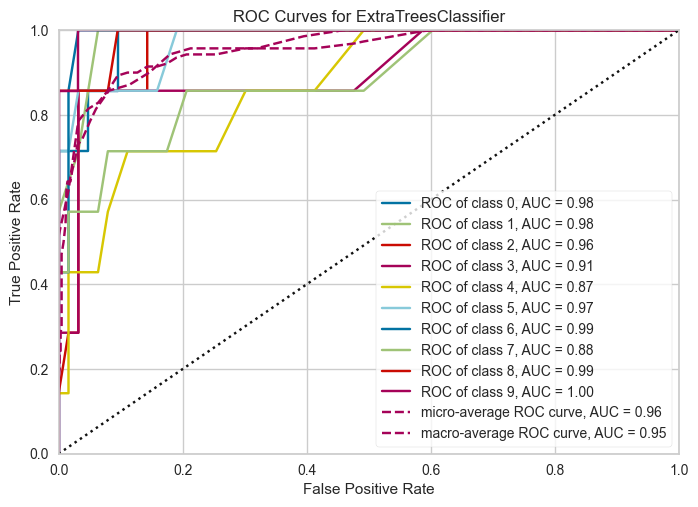

In [62]:
plot_model(model)

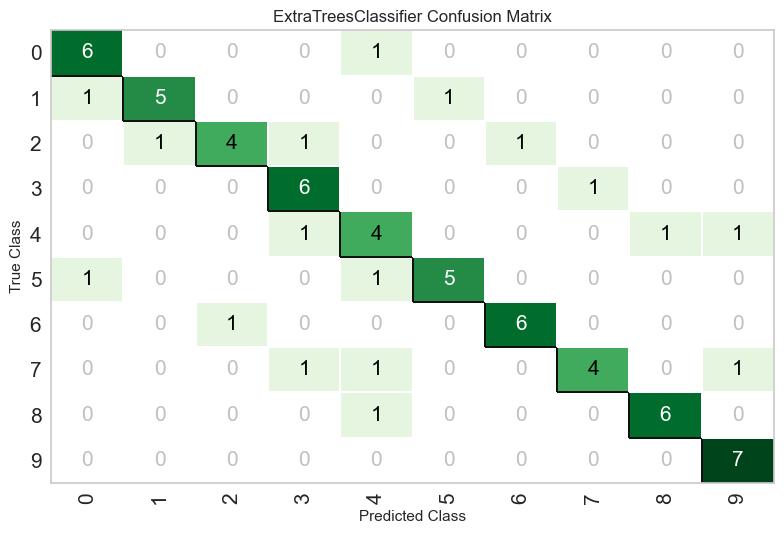

In [67]:
plot_model(model, 'confusion_matrix')

sklearn

In [53]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)

In [58]:
pipeextratree = Pipeline([('scaler', MinMaxScaler()),
                 ('model', ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False))])
pipeextratree.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 MinMaxScaler(clip=False, copy=True, feature_range=(0, 1))),
                ('model',
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=100, n_jobs=-1,
                                      oob_score=False, random_state=123,
                                      verbose=0, warm_start=False))],
         verbose=False)

In [59]:
y_pred = pipeextratree.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       0.67      0.57      0.62         7
           2       1.00      0.86      0.92         7
           3       0.50      0.86      0.63         7
           4       0.57      0.57      0.57         7
           5       0.50      0.14      0.22         7
           6       0.88      1.00      0.93         7
           7       0.25      0.14      0.18         7
           8       0.67      0.86      0.75         7
           9       0.57      0.57      0.57         7

    accuracy                           0.64        70
   macro avg       0.63      0.64      0.62        70
weighted avg       0.63      0.64      0.62        70

